In [16]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt


In [17]:
%matplotlib inline

In [18]:
def flip():
    """Simulates a coin flip to return 'heads' or 'tails'"""
    return random.choice(["heads", "tails"])

In [19]:
def flips(n = 16):
    """Flips coin 2^n number of times and records the heads and tails count at intervals of
    2^0, 2^1, 2^2"""
    counter = 0
    head_count = []
    tail_count = []
    heads = 0
    tails = 0
    while counter < (2 ** n):
        result = flip()
        if result == "heads":
            heads += 1
        else:
            tails += 1
        counter += 1
        for i in range(n+1):
            if counter == 2 ** i:
                head_count.append(heads)
                tail_count.append(tails)
    return head_count, tail_count

In [20]:
y = flip()

In [21]:
print(y)

tails


In [22]:
a, b = flips()

In [23]:
print(a)
print(b)

[0, 1, 2, 2, 7, 13, 26, 54, 128, 244, 494, 1009, 2033, 4091, 8173, 16354, 32966]
[1, 1, 2, 6, 9, 19, 38, 74, 128, 268, 530, 1039, 2063, 4101, 8211, 16414, 32570]


In [24]:
diff = [a[i] - b[i] for i in range(len(a))]

In [25]:
print(diff)

[-1, 0, 0, -4, -2, -6, -12, -20, 0, -24, -36, -30, -30, -10, -38, -60, 396]


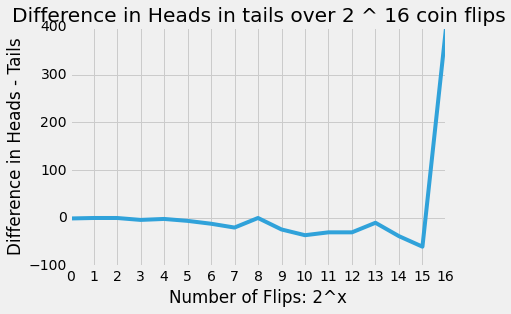

In [26]:
with plt.style.context('fivethirtyeight'):
    """To make a line graph use plt.plot, give it x and y values.  In this case x is 0 to 16
    for each of the times we take the snapshot of the heads and tails values.  """
    x1 = [str(i) for i in range(17)]
    y1 = diff
    plt.plot(diff)
    plt.xticks(range(17), x1)
    plt.xlabel("Number of Flips: 2^x")
    plt.ylabel("Difference in Heads - Tails")
    plt.title("Difference in Heads in tails over 2 ^ 16 coin flips")
    plt.show()

In [27]:
ratio = [a[i]/b[i] for i in range(len(a))]

In [28]:
print(ratio)

[0.0, 1.0, 1.0, 0.3333333333333333, 0.7777777777777778, 0.6842105263157895, 0.6842105263157895, 0.7297297297297297, 1.0, 0.9104477611940298, 0.9320754716981132, 0.971126082771896, 0.9854580707707222, 0.9975615703486954, 0.9953720618682256, 0.9963445838917997, 1.0121584280012281]


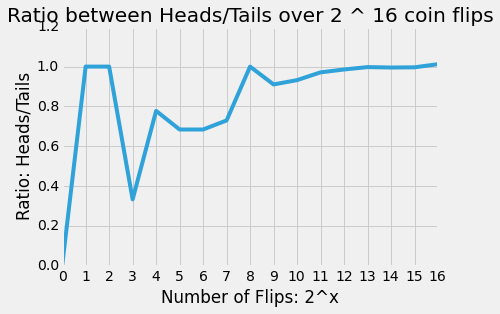

In [29]:
with plt.style.context('fivethirtyeight'):
    """Another line chart plotting the ratio of heads to tails as more coins are flipped.  
    As the number of flips grows, the ratio evens out toward 1.00.  Should look up
    plt.xticks to clarify usage."""
    x1 = [str(i) for i in range(17)]
    y1 = ratio
    plt.plot(ratio)
    plt.xticks(range(17), x1)
    plt.xlabel("Number of Flips: 2^x")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Ratio between Heads/Tails over 2 ^ 16 coin flips")
    plt.show()

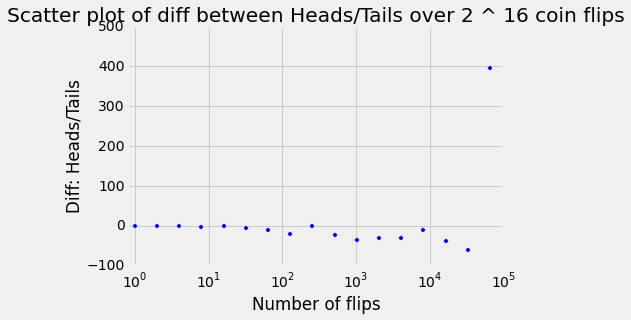

In [30]:
with plt.style.context('fivethirtyeight'):
    """A scatter plot showing the difference between heads and tails over 2^16 coin flips.
    Plotting x with log allows us to show the points evenly distributed over the x axis."""
    x1 = [2**i for i in range(17)]
    y1 = diff
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Diff: Heads/Tails")
    plt.title("Scatter plot of diff between Heads/Tails over 2 ^ 16 coin flips")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

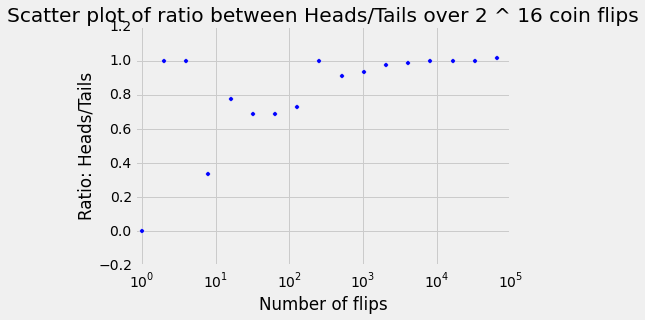

In [31]:
with plt.style.context('fivethirtyeight'):
    """A scatter plot showing the ratio between heads and tails over 2^16 coin flips.
    Plotting x with log allows us to show the points evenly distributed over the x axis.
    The ratio approaches 1.00 with more flips."""
    x1 = [2**i for i in range(17)]
    y1 = ratio
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Scatter plot of ratio between Heads/Tails over 2 ^ 16 coin flips")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

##Notes
Must give plt the x and y values for your graph.  Displaying log can help you see a large data set easier.

After about 10^3 flips, the data starts to approach what we would expect.

To understand x ticks:  sets the number of ticks on the x axis in a range and sets the labels
of the ticks.  
#### set the locations of the xticks
xticks( arange(6) )

#### set the locations and labels of the xticks
xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )

###plt.axis sets the location of the x and y axis
can set it to start at a different spot, for example not at xmin or xmax
first get the values from plt.axis()
similar to the way we offset the top and bottom of y values in the box plot in class

#Setup:
remember to import matplotlib.pyplot as plt
remember to import statistics as st
remember to set up your virtualenv
echo to .envrc
direnv allow
pip install -r requirements.txt




In [32]:
def sim_many(n = 20):
    """This makes a dict with keys 1 to 20 for the 20 trials of 2^16 rolls.  Reuses flips()
    from previous problem to create values of number of heads, number of tails in two lists,
    each with 17 items for the data points from 2^0 to 2^16."""
    results = {}
    for i in range(n):
        num_heads, num_tails = flips()    
        results[i] = (num_heads, num_tails)
    return results

In [33]:
data_set = sim_many()

In [34]:
print((data_set)[0])

([1, 2, 2, 4, 9, 18, 38, 71, 130, 250, 506, 997, 1998, 4050, 8122, 16330, 32703], [0, 0, 2, 4, 7, 14, 26, 57, 126, 262, 518, 1051, 2098, 4142, 8262, 16438, 32833])


In [35]:
def sim_create_data_dict(n = 20):
    """Creates a dict with 17 keys from 0 to 16 to hold average mean data for the 17 data
    points of the 20 trials.
    Creates a new trial and iterates over the heads and tails counts for each
    data point, appending the calculated ratio to a list in the original dictionary.
    It does this 20 times to create lists length 20 for each dictionary value."""
    ratio_dict = {}
    for x in range((17)):
        ratio_dict[x] = []
    for i in range(n):
        num_heads, num_tails = flips()
        for j in range(len(num_heads)):
            if num_tails[j] == 0:
                ratio_dict[j].append(0)
            else:
                ratio_dict[j].append(num_heads[j]/num_tails[j])
    return ratio_dict            

In [36]:
new_data_set = sim_create_data_dict()

In [37]:
print(new_data_set[1])

[1.0, 1.0, 1.0, 1.0, 0, 0.0, 0.0, 0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1.0, 1.0, 0, 0.0]


In [38]:
def mean_of_each_data_point(data_set):
    """Iterates over dictionary to create a mean for the ratio at each data measurement
    point."""
    return [st.mean(v) for k, v in data_set.items()]
    

In [39]:
ratio_data_list = mean_of_each_data_point(new_data_set)
print(ratio_data_list)

[0.0, 0.5, 0.75, 1.1371428571428572, 1.0425197025197026, 1.0584775664651827, 0.9944987272998789, 0.996266864309035, 0.9839947303801999, 0.9945269250082559, 1.0080681153651758, 1.004285657121836, 1.0040854507784638, 0.9949612987984333, 0.9982908919709492, 0.9992148924449845, 1.0001707319459139]


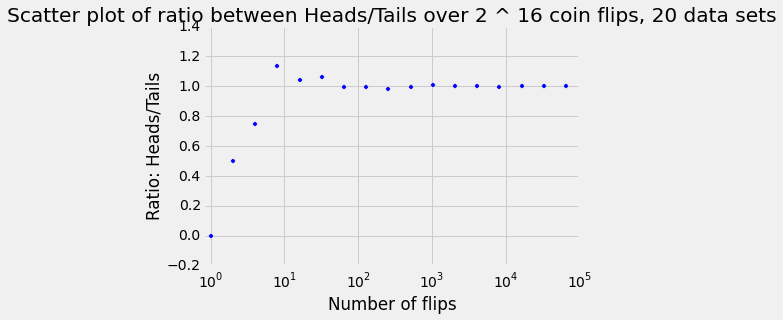

In [40]:
with plt.style.context('fivethirtyeight'):
    """Scatter plot of the means of the ratios at each data collection point.  Can understand
    that as we flip more and more coins the ratio of heads to tails approaches 1.000.  Using
    log for the x scale allows us to display all the way out to 2^16 flips on a normalized
    graph."""
    x1 = [2**i for i in range(17)]
    y1 = ratio_data_list
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails ")
    plt.title("Scatter plot of ratio between Heads/Tails over 2 ^ 16 coin flips, 20 data sets")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

In [41]:
def sd_of_each_data_point(data_set):
    return [st.stdev(v) for k, v in data_set.items()]

In [42]:
sd_data_list = sd_of_each_data_point(new_data_set)
print(sd_data_list)

[0.0, 0.512989176042577, 0.8710751573914626, 0.7971688775647972, 0.5028497790598728, 0.4470216952374792, 0.21700353073221684, 0.1971129675029267, 0.13524972596245563, 0.07659902435418937, 0.06224504975520687, 0.04270711843460852, 0.03148225070264662, 0.022749749319709408, 0.01328228667123468, 0.00902210994507466, 0.007154513228149698]


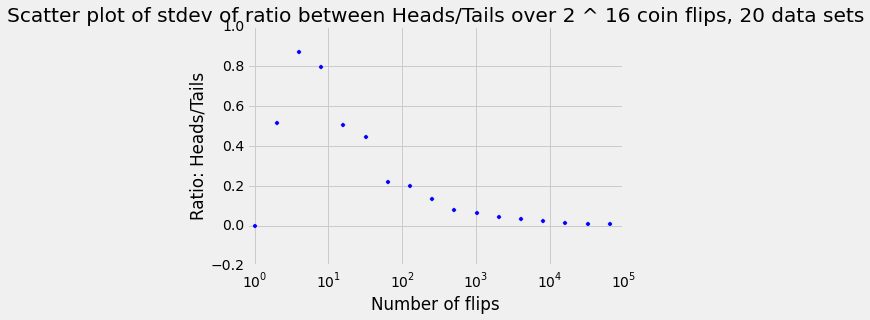

In [43]:
with plt.style.context('fivethirtyeight'):
    """Scatter plot of the means of the ratios at each data collection point.  Can understand
    that as we flip more and more coins the sd of the ratio of heads to tails approaches 0.000.  Using
    log for the x scale allows us to display all the way out to 2^16 flips on a normalized
    graph."""
    x1 = [2**i for i in range(17)]
    y1 = sd_data_list
    plt.scatter(x1, y1)
    plt.xscale('log')
    plt.xlabel("Number of flips")
    plt.ylabel("Ratio: Heads/Tails")
    plt.title("Scatter plot of stdev of ratio between Heads/Tails over 2 ^ 16 coin flips, 20 data sets")
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([.8, xmax, ymin, ymax])
    plt.show()

In [44]:
def ratio_heads_tails_flip_n_times(n=100):
    """Flips coin n times and returns the ratio of heads to tails for that data set."""
    counter = 0
    heads = 0
    tails = 0
    while counter < (n):
        result = flip()
        if result == "heads":
            heads += 1
        else:
            tails += 1
        counter += 1
    return (heads/tails)
    

In [45]:
ratio_heads_trial = ratio_heads_tails_flip_n_times()
print(ratio_heads_trial)

1.173913043478261


In [46]:
def run_trial_x_times(number_of_trials, n=100):
    """Flips a coin n times for the requested number of trials.  Returns a list with an average
    ratio for each trial.  The list will have the same lenght as the number of trials."""
    results_list = []
    for i in range(number_of_trials):
        results_list.append(ratio_heads_tails_flip_n_times(n))
    return results_list

In [47]:
ratio_list_1000 = run_trial_x_times(1000)
print(len(ratio_list_1000))
print(ratio_list_1000[656])

1000
1.0


In [48]:
results_100000_by_100 = run_trial_x_times(100000)
results_100000_by_1000 = run_trial_x_times(100000, 1000)

In [50]:
len(results_100000_by_100)
print(st.stdev(results_100000_by_100))

0.20881642853939997


In [51]:
len(results_100000_by_1000)
print(st.stdev(results_100000_by_1000))

0.06321722829541705


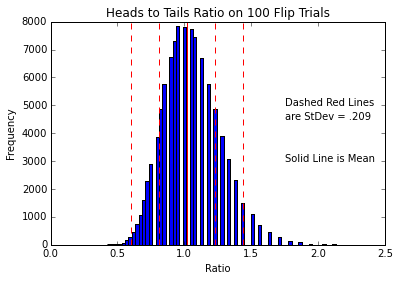

In [55]:
"""Histogram shows relatively normal distribution.  Used technique from class to display
lines at stdevs.  Display of text is with plt.text, using x and y axis values for location."""
plt.hist(results_100000_by_100, bins = 75)
ymin, ymax = plt.ylim()
mean = st.mean(results_100000_by_100)
stdev = st.stdev(results_100000_by_100)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Heads to Tails Ratio on 100 Flip Trials")
plt.text( 1.75, 5000, 'Dashed Red Lines')
plt.text( 1.75, 4500, 'are StDev = .209')
plt.text( 1.75, 3000, 'Solid Line is Mean')
plt.show()

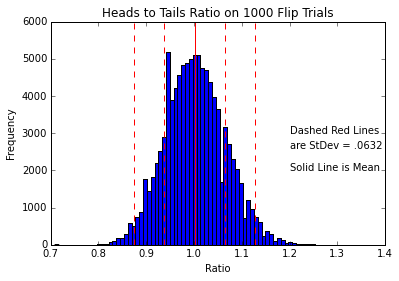

In [56]:
plt.hist(results_100000_by_1000, bins = 75)

ymin, ymax = plt.ylim()
mean = st.mean(results_100000_by_1000)
stdev = st.stdev(results_100000_by_1000)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Heads to Tails Ratio on 1000 Flip Trials")
plt.text( 1.2, 3000, 'Dashed Red Lines')
plt.text( 1.2, 2600, 'are StDev = .0632')
plt.text( 1.2, 2000, 'Solid Line is Mean')
plt.show()

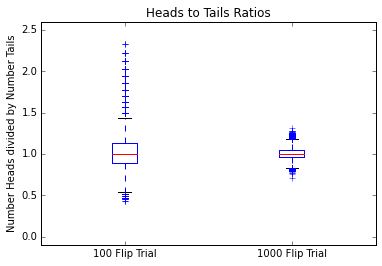

In [57]:

plt.boxplot([results_100000_by_100, results_100000_by_1000])
ymin, ymax = plt.ylim()
plt.ylim(ymin - .1, ymax + .1)
plt.title("Heads to Tails Ratios")
plt.ylabel("Number Heads divided by Number Tails")
plt.xticks(range(1,3), ["100 Flip Trial", "1000 Flip Trial"])
plt.show()

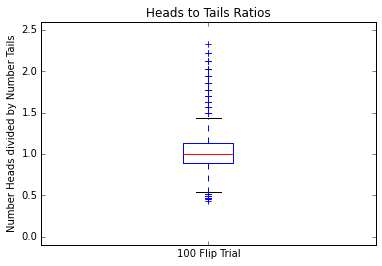

In [58]:

plt.boxplot(results_100000_by_100)
ymin, ymax = plt.ylim()
plt.ylim(ymin - .1, ymax + .1)
plt.title("Heads to Tails Ratios")
plt.ylabel("Number Heads divided by Number Tails")
plt.xticks(range(1,2), ["100 Flip Trial"])
plt.show()

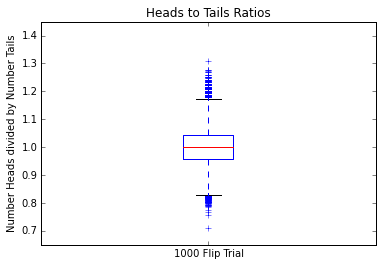

In [60]:

plt.boxplot(results_100000_by_1000)
ymin, ymax = plt.ylim()
plt.ylim(ymin - .05, ymax + .05)
plt.title("Heads to Tails Ratios")
plt.ylabel("Number Heads divided by Number Tails")
plt.xticks(range(1,2), ["1000 Flip Trial"])
plt.show()

##Further notes:
Can see that we have more outliers in the 100 Flip Trials and the stdev from the mean for the ratios is much larger.  As we do more flips in each trial the data get closer to the standard distribution.  I was trying to figure out what the standard box plot on matplotlib is, looks like the whiskers are at 1.5 iqr above and below the box?

Also was interesting to see how long it took to do the 1000 Flip Trial vs the 100 Flip trial when we did it 100000 times.

The stdev for the mean of the ratios at 1000 flips and 100 flips was quite different -- .063 to .21.  Flipping 1000 times made the data more as we would expect it to be.

The hardest part of the problem was figuring out how to hold the data from the 20 trials where we needed to keep data from 17 points for each trial.  Definitely took a few rewrites to do that and I wish I had taken some time to map that out before I went to code.

